In [10]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Karen
[nltk_data]     Pinto\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'GOOG', 'FB']

In [12]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'}) # to get access from finviz
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser') # will return the source code of that url page
    # from the source code, it is noticed that all the articles are stored in a table with the id=news-table
    # so lets access the whole table
    news_table = html.find(id='news-table') 
    news_tables[ticker] = news_table # so here we store the whole table in a dictionary with key 'ticker'


In [13]:
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df1 = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
print(df)

    ticker       date       time  \
0     AMZN  Mar-19-22  01:32AM     
1     AMZN  Mar-19-22  12:57AM     
2     AMZN  Mar-19-22  12:50AM     
3     AMZN  Mar-18-22  07:36PM     
4     AMZN  Mar-18-22  07:03PM     
..     ...        ...        ...   
295     FB  Mar-11-22  04:12PM     
296     FB  Mar-11-22  03:48PM     
297     FB  Mar-11-22  02:39PM     
298     FB  Mar-11-22  02:26PM     
299     FB  Mar-11-22  01:36PM     

                                                 title  
0    UPDATE 1-U.S. court dismisses D.C. antitrust l...  
1    U.S. court dismisses D.C. antitrust lawsuit ag...  
2    U.S. court dismisses D.C. antitrust lawsuit ag...  
3    Amazon Antitrust Lawsuit in D.C. Dismissed by ...  
4                       Why MongoDB Stock Popped Today  
..                                                 ...  
295  Russia Will Ban Instagram, After Meta Allows U...  
296      Why These 10 Stocks Are on the Move on Friday  
297  Russia Asks Court to Label Facebook, Instagram...

In [14]:
vader = SentimentIntensityAnalyzer()

print (df['title'])

0      UPDATE 1-U.S. court dismisses D.C. antitrust l...
1      U.S. court dismisses D.C. antitrust lawsuit ag...
2      U.S. court dismisses D.C. antitrust lawsuit ag...
3      Amazon Antitrust Lawsuit in D.C. Dismissed by ...
4                         Why MongoDB Stock Popped Today
                             ...                        
295    Russia Will Ban Instagram, After Meta Allows U...
296        Why These 10 Stocks Are on the Move on Friday
297    Russia Asks Court to Label Facebook, Instagram...
298    Russia Files Criminal Lawsuit Against Facebook...
299    REFILE-Meta exec Clegg says rule changes on sp...
Name: title, Length: 300, dtype: object


In [15]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
f2 = lambda title: vader.polarity_scores(title)['pos']
df['pos'] = df['title'].apply(f2)
f3 = lambda title: vader.polarity_scores(title)['neg']
df['neg'] = df['title'].apply(f2)
f4 = lambda title: vader.polarity_scores(title)['neu']
df['neu'] = df['title'].apply(f2)

print(df)

    ticker       date       time  \
0     AMZN  Mar-19-22  01:32AM     
1     AMZN  Mar-19-22  12:57AM     
2     AMZN  Mar-19-22  12:50AM     
3     AMZN  Mar-18-22  07:36PM     
4     AMZN  Mar-18-22  07:03PM     
..     ...        ...        ...   
295     FB  Mar-11-22  04:12PM     
296     FB  Mar-11-22  03:48PM     
297     FB  Mar-11-22  02:39PM     
298     FB  Mar-11-22  02:26PM     
299     FB  Mar-11-22  01:36PM     

                                                 title  compound    pos  \
0    UPDATE 1-U.S. court dismisses D.C. antitrust l...   -0.0516  0.160   
1    U.S. court dismisses D.C. antitrust lawsuit ag...   -0.0516  0.177   
2    U.S. court dismisses D.C. antitrust lawsuit ag...   -0.0516  0.177   
3    Amazon Antitrust Lawsuit in D.C. Dismissed by ...   -0.0516  0.177   
4                       Why MongoDB Stock Popped Today    0.0000  0.000   
..                                                 ...       ...    ...   
295  Russia Will Ban Instagram, After Meta

In [16]:
f = lambda title: vader.polarity_scores(title)['compound']

df['compund'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

f1 = lambda title: vader.polarity_scores(title)['neu']
df1['neu'] = df1['title'].apply(f1)
df1['date'] = pd.to_datetime(df.date).dt.date

<Figure size 720x576 with 0 Axes>

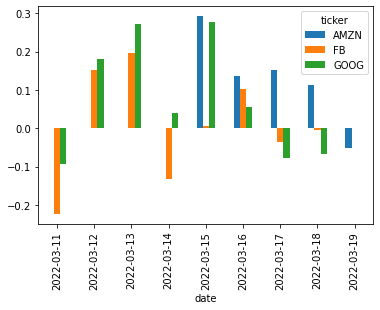

In [24]:
plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker','date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound',axis='columns').transpose()
mean_df.plot(kind='bar')
plt.show()

<Figure size 1440x720 with 0 Axes>

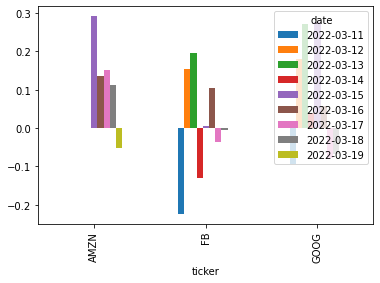

In [27]:
plt.figure(figsize=(20,10))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()

<Figure size 1440x720 with 0 Axes>

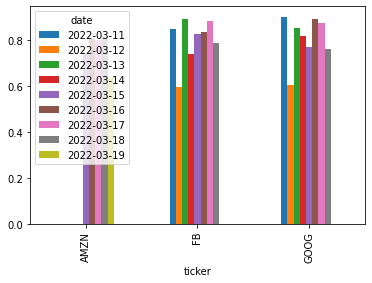

In [25]:
plt.figure(figsize=(20,10))
mean_df1 = df1.groupby(['ticker', 'date']).mean().unstack()
mean_df1.head()
mean_df1 = mean_df1.xs('neu', axis="columns")
mean_df1.plot(kind='bar')
plt.show()

<Figure size 1440x720 with 0 Axes>

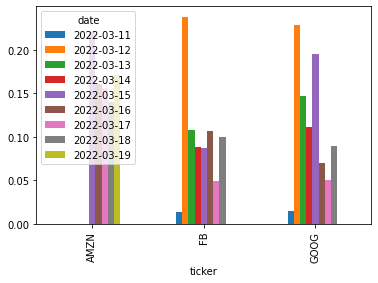

In [20]:
plt.figure(figsize=(20,10))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('neg', axis="columns")
mean_df.plot(kind='bar')
plt.show()

<Figure size 1440x720 with 0 Axes>

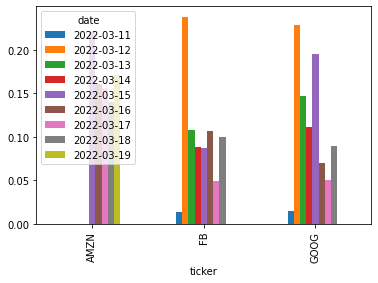

In [21]:
plt.figure(figsize=(20,10))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('pos', axis="columns")
mean_df.plot(kind='bar')
plt.show()

In [22]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
f2 = lambda title: vader.polarity_scores(title)['pos']
df['pos'] = df['title'].apply(f2)
f3 = lambda title: vader.polarity_scores(title)['neg']
df['neg'] = df['title'].apply(f2)
f4 = lambda title: vader.polarity_scores(title)['neu']
df['neu'] = df['title'].apply(f2)

print(df)


    ticker        date       time  \
0     AMZN  2022-03-19  01:32AM     
1     AMZN  2022-03-19  12:57AM     
2     AMZN  2022-03-19  12:50AM     
3     AMZN  2022-03-18  07:36PM     
4     AMZN  2022-03-18  07:03PM     
..     ...         ...        ...   
295     FB  2022-03-11  04:12PM     
296     FB  2022-03-11  03:48PM     
297     FB  2022-03-11  02:39PM     
298     FB  2022-03-11  02:26PM     
299     FB  2022-03-11  01:36PM     

                                                 title  compound    pos  \
0    UPDATE 1-U.S. court dismisses D.C. antitrust l...   -0.0516  0.160   
1    U.S. court dismisses D.C. antitrust lawsuit ag...   -0.0516  0.177   
2    U.S. court dismisses D.C. antitrust lawsuit ag...   -0.0516  0.177   
3    Amazon Antitrust Lawsuit in D.C. Dismissed by ...   -0.0516  0.177   
4                       Why MongoDB Stock Popped Today    0.0000  0.000   
..                                                 ...       ...    ...   
295  Russia Will Ban Instagram